In [1]:
import cv2
from trackers import Tracker
from utils import read_video

In [3]:
video_frames = read_video('input_video/08fd33_4.mp4')
tracker = Tracker('models/best.pt')
tracks = tracker.get_object_track(video_frames, read_from_stub= True, stub_path= 'stubs/tracks_stubs.pkl')

In [4]:
for _, player in tracks['players'][0].items():
    bbox = player['bbox']
    frame = video_frames[0]
    crop_img = frame[int(bbox[1]) : int(bbox[3]), int(bbox[0]) : int(bbox[2])]
    cv2.imwrite('output_video/crop_img.jpg', crop_img)
    break

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
img = cv2.imread('output_video/crop_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

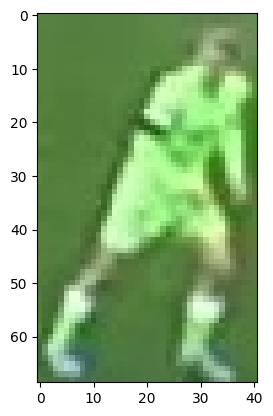

In [7]:
plt.imshow(img)

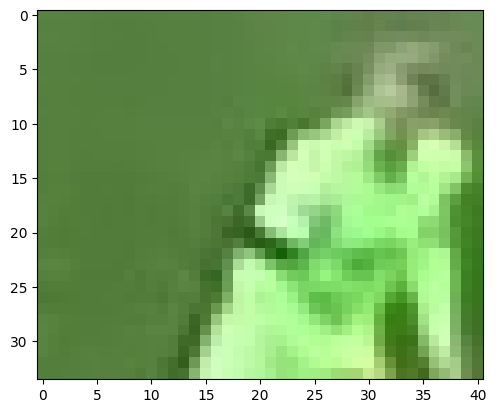

In [8]:
half_imf = img[0: int(img.shape[0] //2), :]
plt.imshow(half_imf)

In [9]:
from sklearn.cluster import KMeans

In [10]:
half_imf.shape

(34, 41, 3)

In [12]:
img_2d = half_imf.reshape(-1, 3)

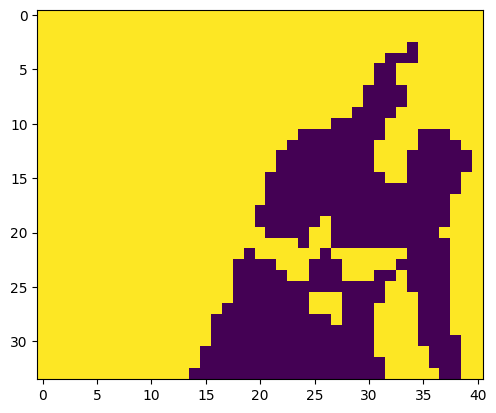

In [13]:
kmeans = KMeans(n_clusters= 2, random_state= 0)
kmeans.fit(img_2d)

labels = kmeans.labels_

clustered_img = labels.reshape(half_imf.shape[0], half_imf.shape[1])
plt.imshow(clustered_img)


In [22]:
corner = [clustered_img[0][0], clustered_img[0][-1], clustered_img[-1][0], clustered_img[-1][-1]]
non_player = max(set(corner), key = corner.count)
non_player

1

In [32]:
kmeans.cluster_centers_

array([[      170.3,      234.38,      144.54],
       [     88.517,      132.62,      64.456]])